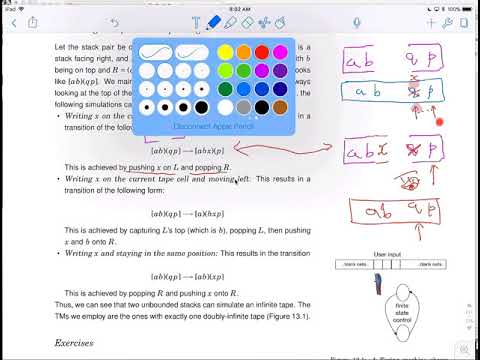

In [4]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('E1X8OTWUxJ0')

# Turing Machines

In [5]:
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *

ModuleNotFoundError: No module named 'lex'

# DTM: accepts "w#w" (markdown)

In [ ]:
flipperTM = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 1, R -> I
I : 1 ; 0, R -> I
''')
DOflipperTM = dotObj_tm(flipperTM, FuseEdges=True)
DOflipperTM


In [ ]:
explore_tm(flipperTM, "010011", 100)

In [ ]:
help(explore_tm)

In [ ]:
wpw_tm = md2mc(src='File', fname="machines/tmfiles/wpw.tm")
dotObj_tm(wpw_tm, FuseEdges = True)

In [ ]:
DOwpw = dotObj_tm(wpw_tm, FuseEdges = True)

In [ ]:
explore_tm(wpw_tm, "001#001", 120)

In [ ]:
wwndtm_md = md2mc(src='File', fname="machines/tmfiles/wwndtm.tm")
dotObj_tm(wwndtm_md)

In [ ]:
DOwwndtm = dotObj_tm(wwndtm_md, FuseEdges=True)
DOwwndtm

In [ ]:
explore_tm(wwndtm_md, "001001", 170)

In [ ]:
addtm = {
    # This TM adds two numbers in base 2.
    #
    # Input: matches the regex "[01][01]*\+[01][01]*"
    #        Interpreted as a+b where a and b are unsigned integers in big-endian
    #          form
    # Output: Occurs on a halt in the "done" state.
    #         The sum of the numbers in big endian form.
    #         No other characters will be on the tape.
    #         There willbe no leading zeros on the answer.
    # Errors: The only errors that can occur are input errors which lead to
    #           a halt on the "error" state. This indicates the input does
    #           not conform to the input requirement.
    # Detail: There is no length maximums on the input.
    #         The numbers can be of different lengths.
    #         Leading zeros on inputs only cause a longer runtime.
    "Q": {
        # final states
        "done", "error",

        # input validation states
        "start",
        "check_a",
        "check_b_start",
        "check_b",

        # adder states
        "read_next_b_digit",
        "0_scan_to_a",
        "1_scan_to_a",
        "n_scan_to_a",
        "0_scan_to_a_digit",
        "1_scan_to_a_digit",
        "n_scan_to_a_digit",
        "0_scan_to_output",
        "1_scan_to_output",
        "c0_scan_to_output",
        "write_carry",
        "scan_to_b",
        "scan_to_b_digit",

        # answer formatting states
        "erase_until_sum",
        "find_end_of_sum",
        "read_msb_of_sum",
        "0_check_end_of_sum",
        "1_check_end_of_sum",
        "0_write_last_digit",
        "1_write_last_digit",
        "write_last_0",
        "write_last_1",
        "0_find_end_of_sum",
        "1_find_end_of_sum",
        "0_find_answer",
        "1_find_answer",
        "write_0",
        "write_1",
        "find_start_of_sum",
        "find_start_of_answer",
        "erase_leading_zeros",
    },

    "Sigma" : {'0', '1', '+'},

    "Gamma" : {'.',
               '0', '1', '+',
               'a', # right side marker for a input
               'b', # right side marker for b input
               'c', # carry indicator
               'X', # 0 used indicator
               'Y', # 1 used indicator
               's', # left side of answer space marker
               },

    "Delta" : {
        # Begin input validation
        ("start", '.') : { ("error", '.', 'S') },
        ("start", '+') : { ("error", '.', 'S') },
        ("start", '0') : { ("check_a", '0', 'R') },
        ("start", '1') : { ("check_a", '1', 'R') },
        #
        ("check_a", '0') : { ("check_a", '0', 'R') },
        ("check_a", '1') : { ("check_a", '1', 'R') },
        ("check_a", '.') : { ("error", '.', 'S') },
        ("check_a", '+') : { ("check_b_start", 'a', 'R') },
        #
        ("check_b_start", '0') : { ("check_b", '0', 'R') },
        ("check_b_start", '1') : { ("check_b", '1', 'R') },
        ("check_b_start", '.') : { ("error", '.', 'S') },
        ("check_b_start", '+') : { ("error", '+', 'S') },
        #
        ("check_b", '0') : { ("check_b", '0', 'R') },
        ("check_b", '1') : { ("check_b", '1', 'R') },
        ("check_b", '.') : { ("read_next_b_digit", 'b', 'L') },
        ("check_b", '+') : { ("error", '+', 'S') },
        # End input validation

        # Begin adder
        ("read_next_b_digit", '0') : { ("0_scan_to_a", 'X', 'L') },
        ("read_next_b_digit", '1') : { ("1_scan_to_a", 'Y', 'L') },
        #
        ("0_scan_to_a", '0') : { ("0_scan_to_a", '0', 'L') },
        ("0_scan_to_a", '1') : { ("0_scan_to_a", '1', 'L') },
        ("0_scan_to_a", 'a') : { ("0_scan_to_a_digit", 'a', 'L') },
        #
        ("1_scan_to_a", '0') : { ("1_scan_to_a", '0', 'L') },
        ("1_scan_to_a", '1') : { ("1_scan_to_a", '1', 'L') },
        ("1_scan_to_a", 'a') : { ("1_scan_to_a_digit", 'a', 'L') },
        #
        ("n_scan_to_a", '0') : { ("n_scan_to_a", '0', 'L') },
        ("n_scan_to_a", '1') : { ("n_scan_to_a", '1', 'L') },
        ("n_scan_to_a", 'a') : { ("n_scan_to_a_digit", 'a', 'L') },
        #
        ("0_scan_to_a_digit", 'X') : { ("0_scan_to_a_digit", 'X', 'L') },
        ("0_scan_to_a_digit", 'Y') : { ("0_scan_to_a_digit", 'Y', 'L') },
        ("0_scan_to_a_digit", '0') : { ("0_scan_to_output", 'X', 'R') },
        ("0_scan_to_a_digit", '1') : { ("1_scan_to_output", 'Y', 'R') },
        ("0_scan_to_a_digit", '.') : { ("0_scan_to_output", 's', 'R') },
        ("0_scan_to_a_digit", 's') : { ("0_scan_to_output", 's', 'R') },
        #
        ("1_scan_to_a_digit", 'X') : { ("1_scan_to_a_digit", 'X', 'L') },
        ("1_scan_to_a_digit", 'Y') : { ("1_scan_to_a_digit", 'Y', 'L') },
        ("1_scan_to_a_digit", '0') : { ("1_scan_to_output", 'X', 'R') },
        ("1_scan_to_a_digit", '1') : { ("c0_scan_to_output", 'Y', 'R') },
        ("1_scan_to_a_digit", '.') : { ("1_scan_to_output", 's', 'R') },
        ("1_scan_to_a_digit", 's') : { ("1_scan_to_output", 's', 'R') },
        #
        ("n_scan_to_a_digit", 'X') : { ("n_scan_to_a_digit", 'X', 'L') },
        ("n_scan_to_a_digit", 'Y') : { ("n_scan_to_a_digit", 'Y', 'L') },
        ("n_scan_to_a_digit", '0') : { ("0_scan_to_output", 'X', 'R') },
        ("n_scan_to_a_digit", '1') : { ("1_scan_to_output", 'Y', 'R') },
        ("n_scan_to_a_digit", '.') : { ("erase_until_sum", 's', 'R') },
        ("n_scan_to_a_digit", 's') : { ("erase_until_sum", 's', 'R') },
        #
        ("0_scan_to_output", '0') : { ("0_scan_to_output", '0', 'R') },
        ("0_scan_to_output", '1') : { ("0_scan_to_output", '1', 'R') },
        ("0_scan_to_output", 'X') : { ("0_scan_to_output", 'X', 'R') },
        ("0_scan_to_output", 'Y') : { ("0_scan_to_output", 'Y', 'R') },
        ("0_scan_to_output", 'a') : { ("0_scan_to_output", 'a', 'R') },
        ("0_scan_to_output", 'b') : { ("0_scan_to_output", 'b', 'R') },
        ("0_scan_to_output", '.') : { ("scan_to_b", '0', 'L') },
        ("0_scan_to_output", 'c') : { ("scan_to_b", '1', 'L') },
        #
        ("1_scan_to_output", '0') : { ("1_scan_to_output", '0', 'R') },
        ("1_scan_to_output", '1') : { ("1_scan_to_output", '1', 'R') },
        ("1_scan_to_output", 'X') : { ("1_scan_to_output", 'X', 'R') },
        ("1_scan_to_output", 'Y') : { ("1_scan_to_output", 'Y', 'R') },
        ("1_scan_to_output", 'a') : { ("1_scan_to_output", 'a', 'R') },
        ("1_scan_to_output", 'b') : { ("1_scan_to_output", 'b', 'R') },
        ("1_scan_to_output", '.') : { ("scan_to_b", '1', 'L') },
        ("1_scan_to_output", 'c') : { ("write_carry", '0', 'R') },
        #
        ("c0_scan_to_output", '0') : { ("c0_scan_to_output", '0', 'R') },
        ("c0_scan_to_output", '1') : { ("c0_scan_to_output", '1', 'R') },
        ("c0_scan_to_output", 'X') : { ("c0_scan_to_output", 'X', 'R') },
        ("c0_scan_to_output", 'Y') : { ("c0_scan_to_output", 'Y', 'R') },
        ("c0_scan_to_output", 'a') : { ("c0_scan_to_output", 'a', 'R') },
        ("c0_scan_to_output", 'b') : { ("c0_scan_to_output", 'b', 'R') },
        ("c0_scan_to_output", '.') : { ("write_carry", '0', 'R') },
        ("c0_scan_to_output", 'c') : { ("write_carry", '1', 'R') },
        #
        ("write_carry", '.') : { ("scan_to_b", 'c', 'L') },
        #
        ("scan_to_b", '0') : { ("scan_to_b", '0', 'L') },
        ("scan_to_b", '1') : { ("scan_to_b", '1', 'L') },
        ("scan_to_b", 'b') : { ("scan_to_b_digit", 'b', 'L') },
        #
        ("scan_to_b_digit", 'X') : { ("scan_to_b_digit", 'X', 'L') },
        ("scan_to_b_digit", 'Y') : { ("scan_to_b_digit", 'Y', 'L') },
        ("scan_to_b_digit", '0') : { ("read_next_b_digit", '0', 'S') },
        ("scan_to_b_digit", '1') : { ("read_next_b_digit", '1', 'S') },
        ("scan_to_b_digit", 'a') : { ("n_scan_to_a", 'a', 'S') },
        # End adder

        # Begin answer formatting
        ("erase_until_sum", '0') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", '1') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'X') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'Y') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'a') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'b') : { ("find_end_of_sum", '.', 'R') },
        #
        ("find_end_of_sum", '0') : { ("find_end_of_sum", '0', 'R') },
        ("find_end_of_sum", '1') : { ("find_end_of_sum", '1', 'R') },
        ("find_end_of_sum", 'c') : { ("read_msb_of_sum", '1', 'S') },
        ("find_end_of_sum", '.') : { ("read_msb_of_sum", '.', 'L') },
        #
        ("read_msb_of_sum", '0') : { ("0_check_end_of_sum", '.', 'L') },
        ("read_msb_of_sum", '1') : { ("1_check_end_of_sum", '.', 'L') },
        #
        ("0_check_end_of_sum", '0') : { ("0_find_end_of_sum", '0', 'L') },
        ("0_check_end_of_sum", '1') : { ("0_find_end_of_sum", '1', 'L') },
        ("0_check_end_of_sum", '.') : { ("0_write_last_digit", '.', 'L') },
        #
        ("1_check_end_of_sum", '0') : { ("1_find_end_of_sum", '0', 'L') },
        ("1_check_end_of_sum", '1') : { ("1_find_end_of_sum", '1', 'L') },
        ("1_check_end_of_sum", '.') : { ("1_write_last_digit", '.', 'L') },
        #
        ("0_write_last_digit", '.') : { ("0_write_last_digit", '.', 'L') },
        ("0_write_last_digit", '0') : { ("write_last_0", '0', 'R') },
        ("0_write_last_digit", '1') : { ("write_last_0", '1', 'R') },
        ("0_write_last_digit", 's') : { ("write_last_0", '.', 'R') },
        #
        ("1_write_last_digit", '.') : { ("1_write_last_digit", '.', 'L') },
        ("1_write_last_digit", '0') : { ("write_last_1", '0', 'R') },
        ("1_write_last_digit", '1') : { ("write_last_1", '1', 'R') },
        ("1_write_last_digit", 's') : { ("write_last_1", '.', 'R') },
        #
        ("write_last_0", '.') : { ("find_start_of_answer", '0', 'S') },
        #
        ("write_last_1", '.') : { ("find_start_of_answer", '1', 'S') },
        #
        ("0_find_end_of_sum", '0') : { ("0_find_end_of_sum", '0', 'L') },
        ("0_find_end_of_sum", '1') : { ("0_find_end_of_sum", '1', 'L') },
        ("0_find_end_of_sum", '.') : { ("0_find_answer", '.', 'L') },
        #
        ("1_find_end_of_sum", '0') : { ("1_find_end_of_sum", '0', 'L') },
        ("1_find_end_of_sum", '1') : { ("1_find_end_of_sum", '1', 'L') },
        ("1_find_end_of_sum", '.') : { ("1_find_answer", '.', 'L') },
        #
        ("0_find_answer", '.') : { ("0_find_answer", '.', 'L') },
        ("0_find_answer", '0') : { ("write_0", '0', 'R') },
        ("0_find_answer", '1') : { ("write_0", '1', 'R') },
        ("0_find_answer", 's') : { ("write_0", '.', 'R') },
        #
        ("1_find_answer", '.') : { ("1_find_answer", '.', 'L') },
        ("1_find_answer", '0') : { ("write_1", '0', 'R') },
        ("1_find_answer", '1') : { ("write_1", '1', 'R') },
        ("1_find_answer", 's') : { ("write_1", '.', 'R') },
        #
        ("write_0", '.') : { ("find_start_of_sum", '0', 'R') },
        #
        ("write_1", '.') : { ("find_start_of_sum", '1', 'R') },
        #
        ("find_start_of_sum", '.') : { ("find_start_of_sum", '.', 'R') },
        ("find_start_of_sum", '0') : { ("find_end_of_sum", '0', 'S') },
        ("find_start_of_sum", '1') : { ("find_end_of_sum", '1', 'S') },
        #
        ("find_start_of_answer", '0') : { ("find_start_of_answer", '0', 'L') },
        ("find_start_of_answer", '1') : { ("find_start_of_answer", '1', 'L') },
        ("find_start_of_answer", '.') : { ("erase_leading_zeros", '.', 'R') },
        #
        ("erase_leading_zeros", '0') : { ("erase_leading_zeros", '.', 'R') },
        ("erase_leading_zeros", '1') : { ("done", '1', 'S') },
        ("erase_leading_zeros", '.') : { ("done", '0', 'S') },
        # End answer formatting
    },

    "q0"    : "start",

    "B"     : '.',

    "F"     : {"done"}
}

In [ ]:
dotObj_tm(addtm)

In [ ]:
dotObj_tm(addtm, FuseEdges=True)

In [ ]:
addtmobj = dotObj_tm(addtm)

In [ ]:
explore_tm(addtm, "11111101+11111101", 735)

In [ ]:
dec_doub = md2mc(src='File', fname='machines/tmfiles/decimal_double_tm.tm')
dotObj_tm(dec_doub)

In [ ]:
dotObj_tm(dec_doub, FuseEdges = True)

In [ ]:
# Doubles the number given on the tape in decimal!
explore_tm(dec_doub, "231", 100)

In [ ]:
collatz_tm = md2mc(src='File', fname='machines/tmfiles/collatz_tm.tm')
dotObj_tm(collatz_tm)

In [ ]:
DOcollatz = dotObj_tm(collatz_tm, FuseEdges=True)
DOcollatz

In [ ]:
# Will loop if the Collatz ("3x+1") program will ever loop!
explore_tm(collatz_tm, "0110", 100)

In [ ]:
shiftl_tm = md2mc(src='File', fname='machines/tmfiles/shift_left_tm.tm')
dotObj_tm(shiftl_tm)

In [ ]:
dotObj_tm(shiftl_tm, FuseEdges=True)

In [ ]:
explore_tm(shiftl_tm, "abaaba", 100)

In [ ]:
shiftr_tm = md2mc(src='File', fname='machines/tmfiles/shift_right_tm.tm')
dotObj_tm(shiftr_tm)

In [ ]:
dotObj_tm(shiftr_tm, True)

In [ ]:
explore_tm(shiftr_tm, "ababba", 100)